In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import geopandas as gpd

In [3]:
#!pip install geopandas

# GeoPandas



In [5]:
nyc_dists = gpd.read_file('shp/geo_export_c65f4ecd-926c-4585-9e55-a3ef3bef824e.shp')

In [6]:
nyc_dists.head(2)

,district,global_id,objectid,section,sectioncod,shape_area,shape_leng,geometry
0,BKN01,72892e3f-1564-47d8-bbe5-e74d13185450,1.0,BKN011,3011.0,3.045136e+07,31857.35332,"POLYGON ((-73.95440 40.73912, -73.95428 40.739..."
1,BKN01,898933d5-715e-492b-8f4e-ba9763fff9f6,2.0,BKN012,3012.0,1.970467e+07,25400.91462,"POLYGON ((-73.96076 40.72158, -73.96053 40.721..."


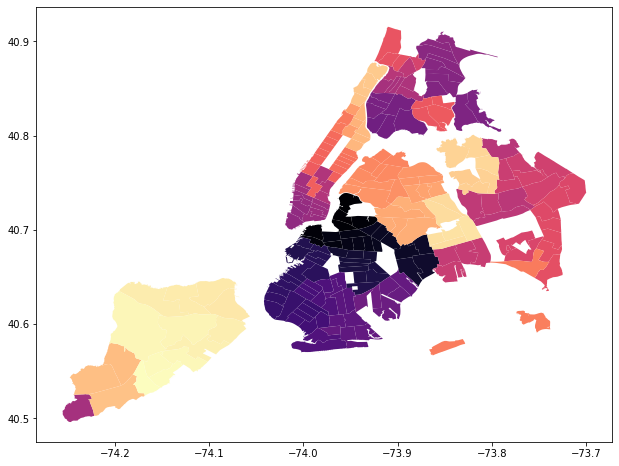

In [13]:
nyc_dists.plot(cmap = "magma", figsize = (15, 8))

In [14]:
ny2 = gpd.read_file('shp2/geo_export_662b5620-27bd-4f5f-8f47-b9b106a775a8.shp')

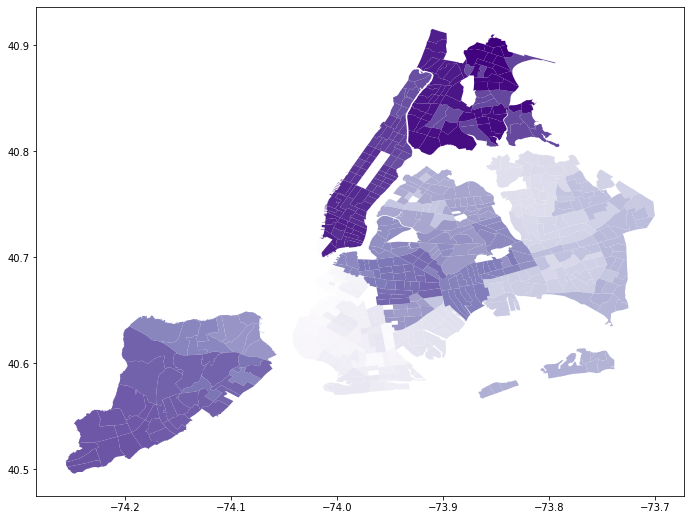

In [19]:
ny2.plot(cmap = 'Purples', figsize = (19, 9))

In [16]:
ny2.head()

,district,freq_bulk,freq_organ,freq_recyc,freq_refus,frequency,global_id,objectid,scheduleco,section,shape_area,shape_leng,geometry
0,MN01,"Mon, Wed, Fri",None,Fri,"Mon, Wed, Fri",A,d9b55c59-b997-4790-8677-66e1e6d00f40,1.0,1011A,1,1.157225e+07,21656.511699,"POLYGON ((-74.01196 40.70736, -74.01211 40.707..."
1,MN01,"Mon, Wed, Fri",None,Mon,"Mon, Wed, Fri",A,b817faf0-2459-4259-92dd-54fbc40182ae,2.0,1013A,3,2.482216e+06,7054.145864,"POLYGON ((-74.00886 40.71927, -74.00884 40.719..."
2,BKS06,Fri,"Tue, Fri",Tue,"Tue, Fri",D,ea6b1c8d-9f38-402b-8ced-b2e71e1daf57,3.0,3061D,1,2.529116e+07,58173.353175,"POLYGON ((-74.01575 40.66458, -74.01690 40.664..."
3,BKS07,Thu,Mon,Mon,"Mon, Thu",C,aa848b9c-ac6d-4e1a-8f35-1cdc8484b7f3,19.0,3071C,1,4.873572e+06,9677.593286,"POLYGON ((-73.98623 40.65793, -73.98610 40.657..."
4,BKS07,Sat,Wed,Wed,"Wed, Sat",E,ff416800-171f-484c-8130-ee3102ad44c8,20.0,3071E,1,3.583718e+06,8686.973151,"POLYGON ((-73.99238 40.65891, -73.99239 40.659..."


In [50]:
ny2['refus_count'] = ny2['freq_refus'].str.split(',').apply(lambda x: len(x))

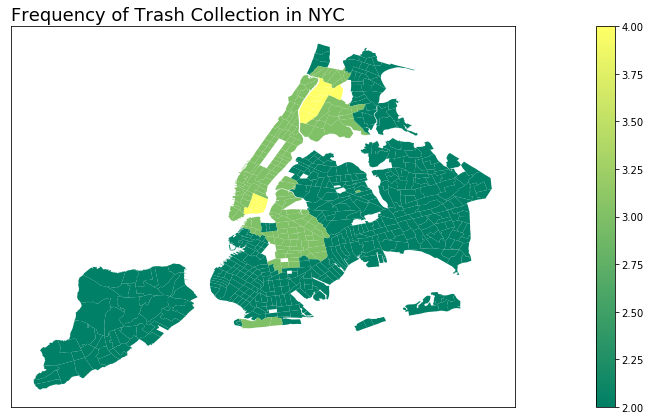

In [60]:
ny2.plot(column = 'refus_count', cmap = 'summer', figsize = (29, 7), legend = True, zorder = 1)
plt.title("Frequency of Trash Collection in NYC", loc = 'left', fontsize = 18)
plt.xticks([])
plt.yticks([]);

### From Examples

In [44]:
import geopandas
import geoplot

world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/geoplot/geoplot.py:680: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  'Plot extent lies outside of the Orthographic projection\'s '


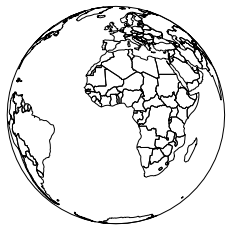

In [45]:
# use the Orthographic map projection (e.g. a world globe)
ax = geoplot.polyplot(
    world, projection=geoplot.crs.Orthographic(), figsize=(8, 4)
)
ax.outline_patch.set_visible(True)

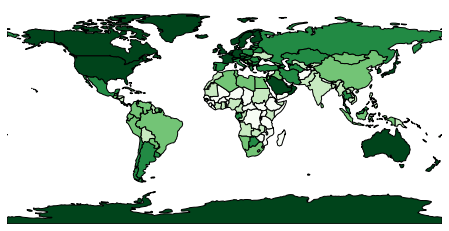

In [46]:
import mapclassify
gpd_per_person = world['gdp_md_est'] / world['pop_est']
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=gpd_per_person, scheme=scheme,
    cmap='Greens', figsize=(8, 4)
)

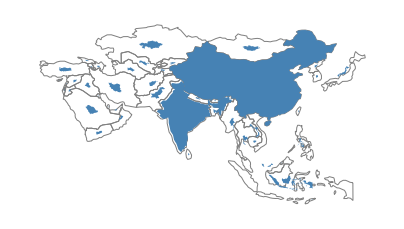

In [47]:
africa = world.query('continent == "Asia"')
ax = geoplot.cartogram(
    africa, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)
geoplot.polyplot(africa, edgecolor='gray', ax=ax)

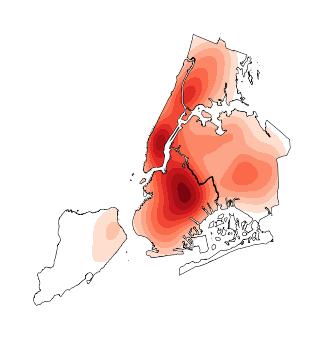

In [48]:
ax = geoplot.kdeplot(
    collisions.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

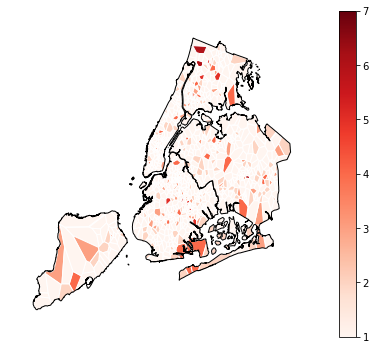

In [49]:
ax = geoplot.voronoi(
    collisions.head(1000), projection=geoplot.crs.AlbersEqualArea(),
    clip=boroughs.simplify(0.001),
    hue='NUMBER OF PERSONS INJURED', cmap='Reds',
    legend=True,
    edgecolor='white'
)
geoplot.polyplot(boroughs, edgecolor='black', zorder=1, ax=ax)


/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/geopandas/geoseries.py:290: UserWarning: GeoSeries.isna() previously returned True for both missing (None) and empty geometries. Now, it only returns True for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use 's.is_empty | s.isna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
  return self.isna()


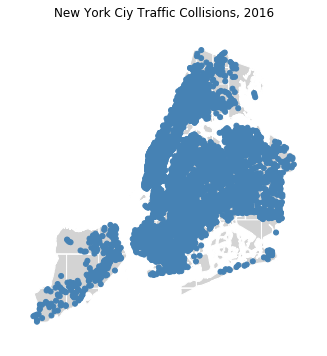

In [64]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
collisions = gpd.read_file(gplt.datasets.get_path('nyc_collision_factors'))

ax = gplt.quadtree(
    collisions, nmax=1,
    projection=gcrs.AlbersEqualArea(), clip=nyc_boroughs,
    facecolor='lightgray', edgecolor='white', zorder=0
)
gplt.pointplot(collisions,  s = 'isna', ax=ax)

plt.title("New York Ciy Traffic Collisions, 2016")
plt.savefig("nyc-collisions-quadtree.png", bbox_inches='tight', pad_inches=0)

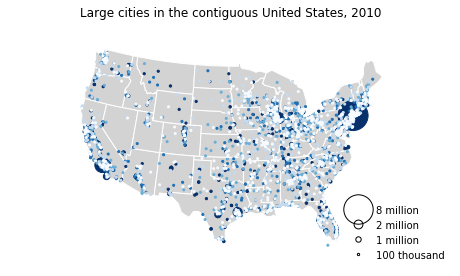

In [67]:
continental_usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
continental_usa_cities = continental_usa_cities.query('STATE not in ["AK", "HI", "PR"]')
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))
scheme = mc.Quantiles(continental_usa_cities['POP_2010'], k=5)

ax = gplt.polyplot(
    contiguous_usa,
    zorder=-1,
    linewidth=1,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='white',
    facecolor='lightgray',
    figsize=(8, 12)
)
gplt.pointplot(
    continental_usa_cities,
    scale='POP_2010',
    limits=(2, 30),
    hue='POP_2010',
    cmap='Blues',
    scheme=scheme,
    legend=True,
    legend_var='scale',
    legend_values=[8000000, 2000000, 1000000, 100000],
    legend_labels=['8 million', '2 million', '1 million', '100 thousand'],
    legend_kwargs={'frameon': False, 'loc': 'lower right'},
    ax=ax
)


plt.title("Large cities in the contiguous United States, 2010")
plt.savefig("largest-cities-usa.png", bbox_inches='tight', pad_inches=0.1)

In [66]:
import mapclassify as mc

In [71]:
df = pd.read_json('https://data.cityofnewyork.us/resource/a3nt-yts4.json')

In [73]:
gdf = gpd.GeoDataFrame(df)

In [75]:
gdf.head()

,the_geom,ats_code,loc_code,loc_name,managed_by,lcc,primarybui,bin,bbl,address,...,zip,geodistric,adimindist,xcoordinat,ycoordinat,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,"{'type': 'Point', 'coordinates': [-73.85554326...",75Q233,Q233,P.S. Q233,1,7,Q686,4447233,4038860800,91-30 METROPOLITAN AVENUE,...,11375,28,75,1024300,197410,14786.0,40.0,3.0,28.0,70.0
1,"{'type': 'Point', 'coordinates': [-73.98866531...",02M212,M212,P.S. 212 Midtown West,1,2,M017,1025092,1010380014,328 WEST 48 STREET,...,10036,2,2,987390,216649,13094.0,12.0,4.0,10.0,10.0
2,"{'type': 'Point', 'coordinates': [-73.73770240...",29Q034,Q034,P.S. 034 John Harvard,1,2,Q034,4240503,4111510081,104-12 SPRINGFIELD BOULEVARD,...,11429,29,29,1056968,198417,24338.0,63.0,3.0,6.0,63.0
3,"{'type': 'Point', 'coordinates': [-73.94070782...",17K091,K091,P.S. 091 The Albany Avenue School,1,2,K091,3106599,3047940026,532 ALBANY AVENUE,...,11203,17,17,1000700,180396,16866.0,17.0,2.0,17.0,44.0
4,"{'type': 'Point', 'coordinates': [-74.19343130...",31R455,R455,Tottenville High School,1,5,R455,5082634,5066130001,100 LUTEN AVENUE,...,10312,31,31,930477,131756,10699.0,15.0,1.0,9.0,77.0


In [69]:
df.head()

,the_geom,ats_code,loc_code,loc_name,managed_by,lcc,primarybui,bin,bbl,address,...,zip,geodistric,adimindist,xcoordinat,ycoordinat,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih
0,"{'type': 'Point', 'coordinates': [-73.85554326...",75Q233,Q233,P.S. Q233,1,7,Q686,4447233,4038860800,91-30 METROPOLITAN AVENUE,...,11375,28,75,1024300,197410,14786.0,40.0,3.0,28.0,70.0
1,"{'type': 'Point', 'coordinates': [-73.98866531...",02M212,M212,P.S. 212 Midtown West,1,2,M017,1025092,1010380014,328 WEST 48 STREET,...,10036,2,2,987390,216649,13094.0,12.0,4.0,10.0,10.0
2,"{'type': 'Point', 'coordinates': [-73.73770240...",29Q034,Q034,P.S. 034 John Harvard,1,2,Q034,4240503,4111510081,104-12 SPRINGFIELD BOULEVARD,...,11429,29,29,1056968,198417,24338.0,63.0,3.0,6.0,63.0
3,"{'type': 'Point', 'coordinates': [-73.94070782...",17K091,K091,P.S. 091 The Albany Avenue School,1,2,K091,3106599,3047940026,532 ALBANY AVENUE,...,11203,17,17,1000700,180396,16866.0,17.0,2.0,17.0,44.0
4,"{'type': 'Point', 'coordinates': [-74.19343130...",31R455,R455,Tottenville High School,1,5,R455,5082634,5066130001,100 LUTEN AVENUE,...,10312,31,31,930477,131756,10699.0,15.0,1.0,9.0,77.0


In [84]:
gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.xcoordinat, df.ycoordinat))

In [183]:
gdf.head()

,the_geom,ats_code,loc_code,loc_name,managed_by,lcc,primarybui,bin,bbl,address,...,geodistric,adimindist,xcoordinat,ycoordinat,:@computed_region_efsh_h5xi,:@computed_region_f5dn_yrer,:@computed_region_yeji_bk3q,:@computed_region_92fq_4b7q,:@computed_region_sbqj_enih,geometry
0,"{'type': 'Point', 'coordinates': [-73.85554326...",75Q233,Q233,P.S. Q233,1,7,Q686,4447233,4038860800,91-30 METROPOLITAN AVENUE,...,28,75,1024300,197410,14786.0,40.0,3.0,28.0,70.0,POINT (1024300.000 197410.000)
1,"{'type': 'Point', 'coordinates': [-73.98866531...",02M212,M212,P.S. 212 Midtown West,1,2,M017,1025092,1010380014,328 WEST 48 STREET,...,2,2,987390,216649,13094.0,12.0,4.0,10.0,10.0,POINT (987390.000 216649.000)
2,"{'type': 'Point', 'coordinates': [-73.73770240...",29Q034,Q034,P.S. 034 John Harvard,1,2,Q034,4240503,4111510081,104-12 SPRINGFIELD BOULEVARD,...,29,29,1056968,198417,24338.0,63.0,3.0,6.0,63.0,POINT (1056968.000 198417.000)
3,"{'type': 'Point', 'coordinates': [-73.94070782...",17K091,K091,P.S. 091 The Albany Avenue School,1,2,K091,3106599,3047940026,532 ALBANY AVENUE,...,17,17,1000700,180396,16866.0,17.0,2.0,17.0,44.0,POINT (1000700.000 180396.000)
4,"{'type': 'Point', 'coordinates': [-74.19343130...",31R455,R455,Tottenville High School,1,5,R455,5082634,5066130001,100 LUTEN AVENUE,...,31,31,930477,131756,10699.0,15.0,1.0,9.0,77.0,POINT (930477.000 131756.000)


In [184]:
gdf.columns

Index(['the_geom', 'ats_code', 'loc_code', 'loc_name', 'managed_by', 'lcc',
       'primarybui', 'bin', 'bbl', 'address', 'city', 'boronum', 'state',
       'zip', 'geodistric', 'adimindist', 'xcoordinat', 'ycoordinat',
       ':@computed_region_efsh_h5xi', ':@computed_region_f5dn_yrer',
       ':@computed_region_yeji_bk3q', ':@computed_region_92fq_4b7q',
       ':@computed_region_sbqj_enih', 'geometry'],
      dtype='object')

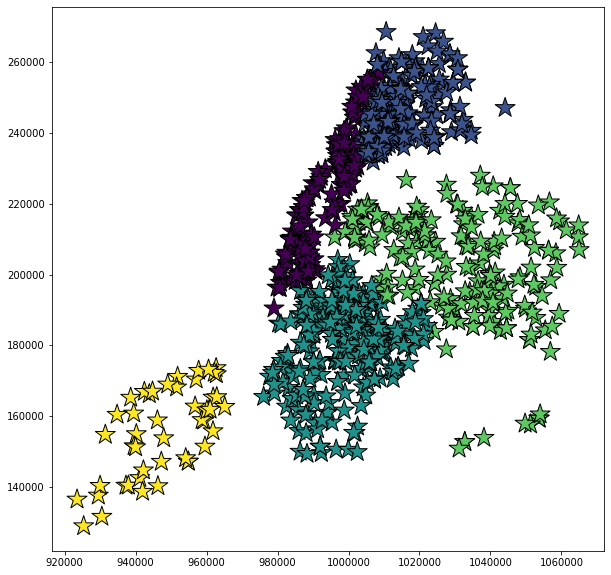

In [188]:
gdf = gdf.cx[:, 1:]
gdf.plot(marker = '*', column = 'boronum', edgecolor = 'black', markersize = 440, figsize = (20,10))